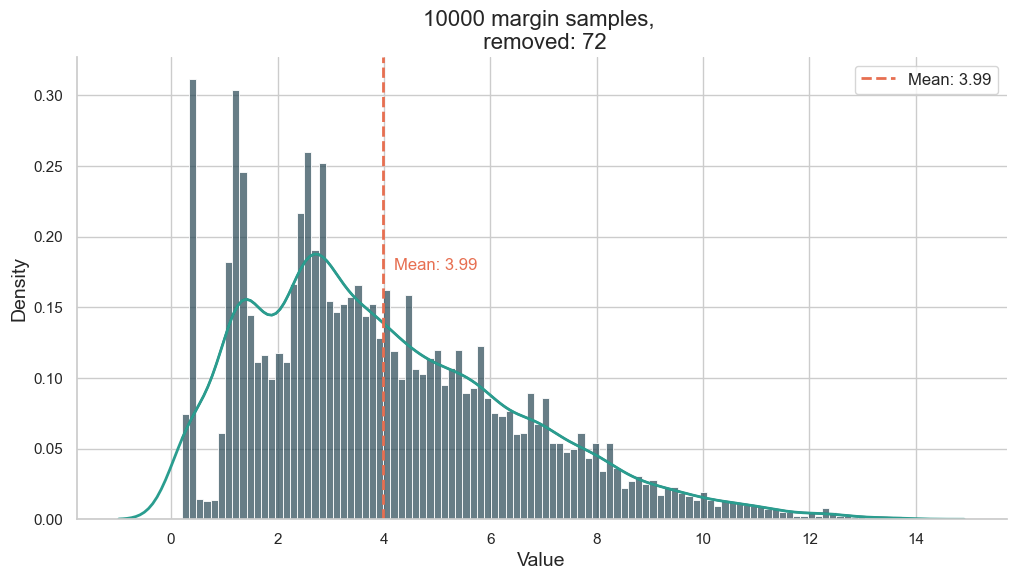

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Read values from CSV file and filter out non-valid values
file_path = "results/ResNet18/margin_values/ResNet18_SignalBlur_small_N35_R15.csv"
valid_values = []

with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    filtered_out_count = 0
    total_count = 0

    for row in csv_reader:
        total_count += 1

        try:
            _, margin_str = row
            value = float(margin_str)
            if value > 0:
                valid_values.append(value)
            else:
                filtered_out_count += 1
        except (ValueError, IndexError):
            filtered_out_count += 1

# Define a stylish color palette
stylish_palette = ['#264653', '#2A9D8F', '#E76F51']
nbins = 100

total_count = 10000

# Set the style
sns.set(style="whitegrid")

# Plot the PMF using valid values and the stylish color palette
plt.figure(figsize=(12, 6))
sns.histplot(valid_values[1:total_count], kde=True, stat='density', bins=nbins, color=stylish_palette[0], alpha=0.7, edgecolor='white')
sns.kdeplot(valid_values[1:total_count], color=stylish_palette[1], linewidth=2)

# Calculate and plot the mean value
mean_value = np.mean(valid_values[1:total_count])
plt.axvline(mean_value, color=stylish_palette[2], linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.text(mean_value + 0.2, 0.18, f'Mean: {mean_value:.2f}', color=stylish_palette[2], fontsize=12, va='center')

# Customize the plot aesthetics
plt.title(f'{total_count} margin samples, \n removed: {filtered_out_count}', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'function'

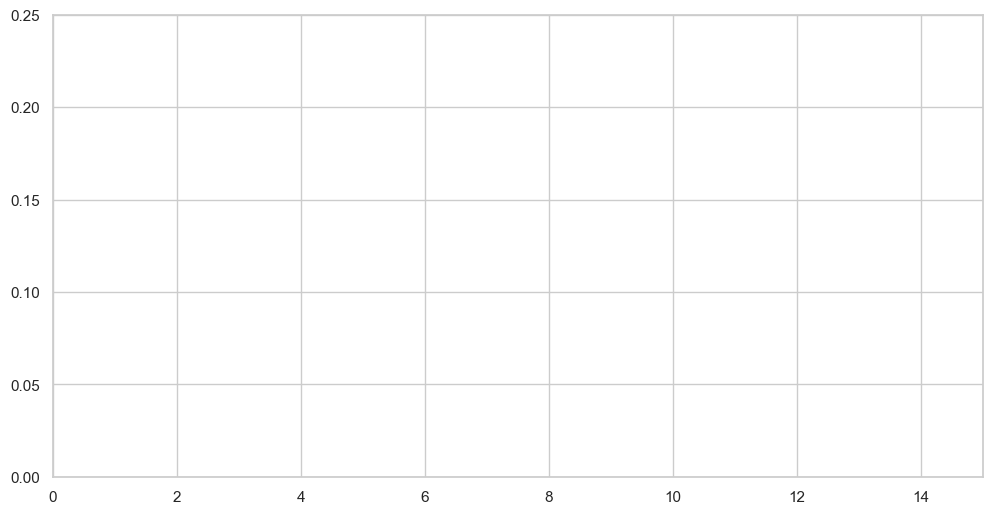

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import csv

# Read values from CSV file and filter out non-valid values
file_path = "results/ResNet18/margin_values/ResNet18_SignalBlur_small_N35_R15.csv"
valid_values = []

with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    filtered_out_count = 0

    for row in csv_reader:
        try:
            _, margin_str = row
            value = float(margin_str)
            if value > 0:
                valid_values.append(value)
            else:
                filtered_out_count += 1
        except (ValueError, IndexError):
            filtered_out_count += 1

# Define a stylish color palette
stylish_palette = ['#264653', '#2A9D8F', '#E76F51']
nbins = 100

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim([0, 15])  # Set initial x-axis limits
ax.set_ylim([0, 0.25])

def update(frame):
    ax.clear()

    total_count = frame * 2000
    current_values = valid_values[1:total_count]

    sns.histplot(current_values, kde=True, stat='density', bins=nbins, color=stylish_palette[0], alpha=0.7, edgecolor='white', ax=ax)
    sns.kdeplot(current_values, color=stylish_palette[1], linewidth=2, ax=ax)

    mean_value = np.mean(current_values)
    ax.axvline(mean_value, color=stylish_palette[2], linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax.text(mean_value + 0.2, 0.18, f'Mean: {mean_value:.2f}', color=stylish_palette[2], fontsize=12, va='center')

    ax.set_title(f'{total_count} margin samples', fontsize=14)
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.legend(fontsize=12)
    ax.set_xlim([0, 15])  # Set initial x-axis limits
    ax.set_ylim([0, 0.2])

    sns.despine()

# Set the total number of frames (each frame increments by 100)
total_frames = len(valid_values) // 2000


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=total_frames,
                              interval=150,
                              repeat=False)
ani.save('animation_samples.gif')


# Display the animation
plt.show()


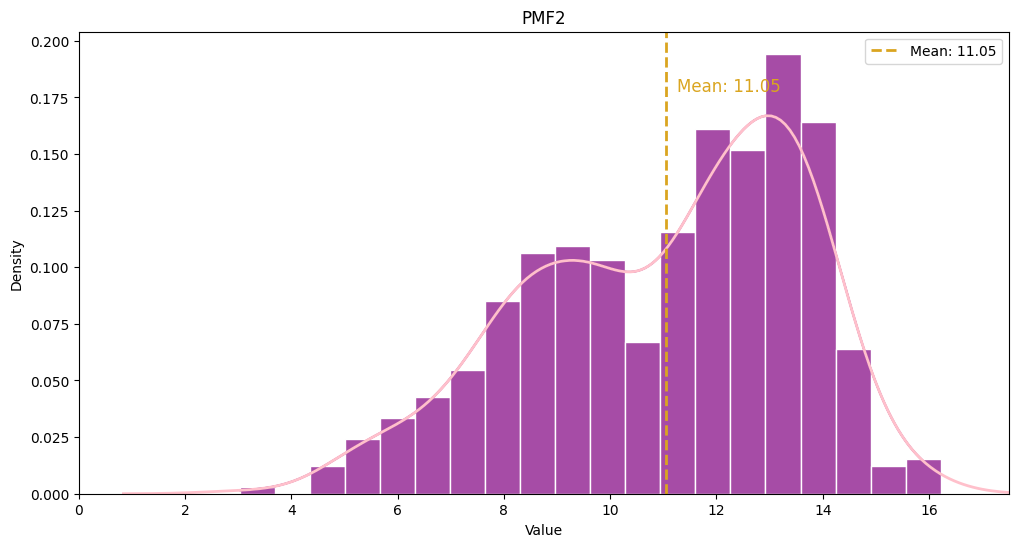

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(10)

# Generate synthetic data
num_samples = 500

# Gaussian distribution around 7 with a smaller standard deviation
dist1 = np.random.normal(loc=9, scale=2, size=int(num_samples/2))

# Gaussian distribution around 10 with a larger standard deviation
dist2 = np.random.normal(loc=13, scale=1.2, size=int(num_samples/2))

# Combine the two distributions
synthetic_data2 = np.concatenate([dist1, dist2])

# Plot the synthetic data
plt.figure(figsize=(12, 6))
sns.histplot(synthetic_data2, kde=True, stat='density', bins=20, color='purple', alpha=0.7,edgecolor='white')
sns.kdeplot(synthetic_data2, color='pink', linewidth=2)

# Calculate and plot the mean value
mean_value = np.mean(synthetic_data2)
plt.axvline(mean_value, color='goldenrod', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.text(mean_value + 0.2, 0.18, f'Mean: {mean_value:.2f}', color='goldenrod', fontsize=12, va='center')
plt.xlim([0, 17.5])

plt.title('PMF2')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


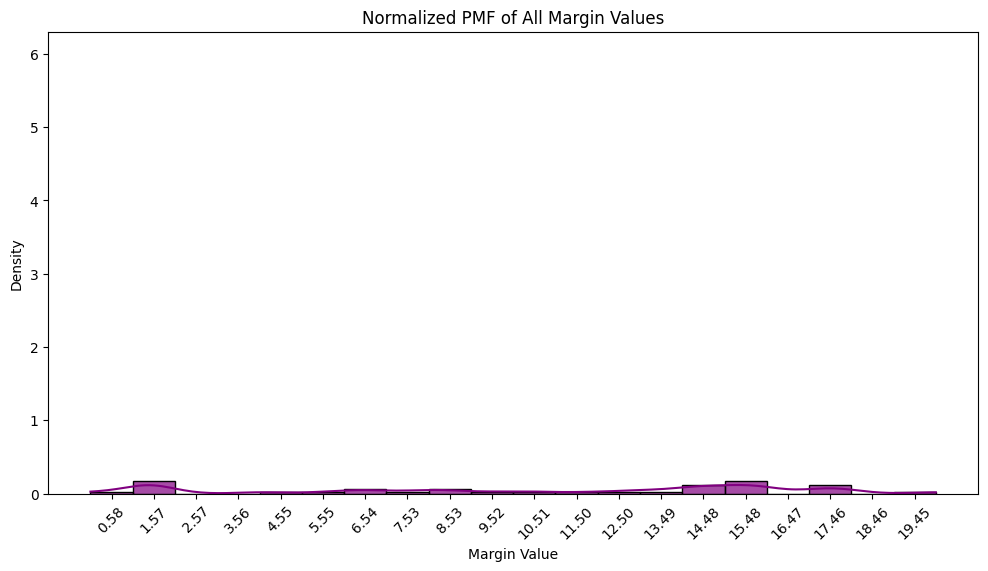

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

csv_file = 'results\CambioMargin_1\margin_ResNet18.csv'
# Read CSV file into a DataFrame
df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + [f'Margin_{i}' for i in range(1, 13)])

# Calculate mean and standard deviation for each combination
df['Mean'] = df.iloc[:, 2:].mean(axis=1)
df['Std'] = df.iloc[:, 2:].std(axis=1)

# Create a new column for all margin values
all_margins = df.iloc[:, 2:].values.flatten()

# Plot normalized pmf of all margin values
plt.figure(figsize=(12, 6))
sns.histplot(all_margins, kde=True, stat='density', bins=20, kde_kws={'bw_method': 0.1}, color='purple', alpha=0.7)

# Plot KDE line with dark yellow color
plt.title('Normalized PMF of All Margin Values')
plt.xlabel('Margin Value')
plt.ylabel('Density')

# Customize x-axis labels
bin_edges = plt.hist(all_margins, bins=20, alpha=0)[1]  # Get bin edges
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.xticks(bin_centers, rotation=45)  # Set x-axis ticks to bin centers


plt.show()



In [17]:
df

,Model,Dataset,Margin_1,Margin_2,Margin_3,Margin_4,Margin_5,Margin_6,Margin_7,Margin_8,Margin_9,Margin_10,Margin_11,Margin_12,Mean,Std
0,ResNet18,ImageNetA_small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ResNet18,ImageNetSD_small,9.7604,19.9471,11.9015,8.2173,8.6215,12.9545,13.1433,5.7379,6.6661,7.7494,15.8052,6.4943,10.583208,4.108526
2,ResNet18,ImageNetVal_small,15.1272,17.7191,15.1294,17.1544,14.4062,14.1633,14.5018,14.1653,17.6365,17.3916,15.6941,15.6956,15.732042,1.331395
3,ResNet18,SignalBlur_small,1.4548,1.3981,1.6214,1.4683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.485650,0.082683


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_margins(csv_file):
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + [f'Margin_{i}' for i in range(1, 100)])

    # Calculate mean, std, and count for each combination
    df['Mean'] = df.iloc[:, 2:].mean(axis=1)
    df['Std'] = df.iloc[:, 2:].std(axis=1)
    df['Count'] = df.iloc[:, 2:].count(axis=1)  # Count non-NaN values

    # Plot all margins
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dataset', y='Mean', hue='Model', data=df, showfliers=False)
    plt.scatter(df['Dataset'], df['Mean'], marker='o', color='red', label='Mean')
    plt.errorbar(df['Dataset'], df['Mean'], yerr=df['Std'], fmt='none', color='red', capsize=5, label='Std Dev')
    
    # Annotate with counts
    for i, row in df.iterrows():
        plt.text(i, row['Mean'], f'Count: {row["Count"]-2}', ha='center', va='bottom', color='blue', fontsize=8)
    
    plt.show()



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normalized_pmf(csv_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + list(range(1, 13)))

    # Iterate through each row in the DataFrame and create plots
    for index, row in df.iterrows():
        model = row['Model']
        dataset = row['Dataset']
        margins = row[2:].dropna().astype(float)

        # Normalize margins to have zero mean and unit variance
        normalized_margins = (margins - margins.mean()) / margins.std()

        # Plot the normalized pmf using a histogram
        plt.figure()
        plt.hist(normalized_margins, bins=20, density=True, alpha=0.6, color='g')

        # Fit a normal distribution to the data
        mu, std = norm.fit(normalized_margins)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)

        # Set labels and title
        plt.title(f'Model: {model}, Dataset: {dataset}')
        plt.xlabel('Normalized Margin Values')
        plt.ylabel('Probability Density')

        # Show the plot or save it to a file
        plt.show()

posx and posy should be finite values
posx and posy should be finite values


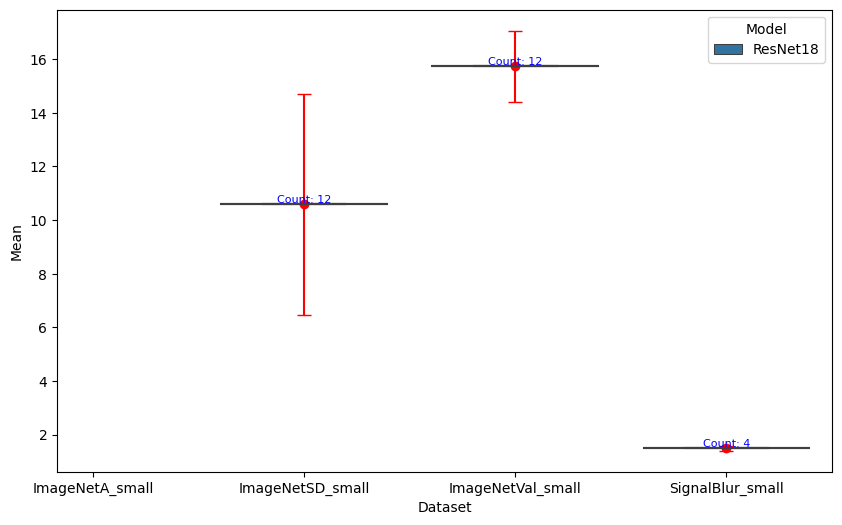

In [4]:
# Example usage
plot_margins('results\CambioMargin_1\margin_ResNet18.csv')

C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:419: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:424: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2

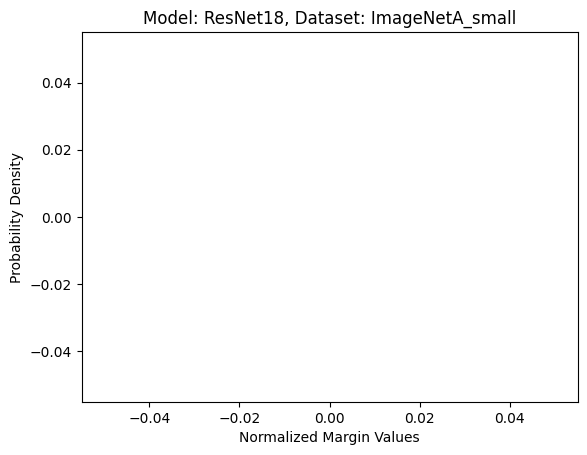

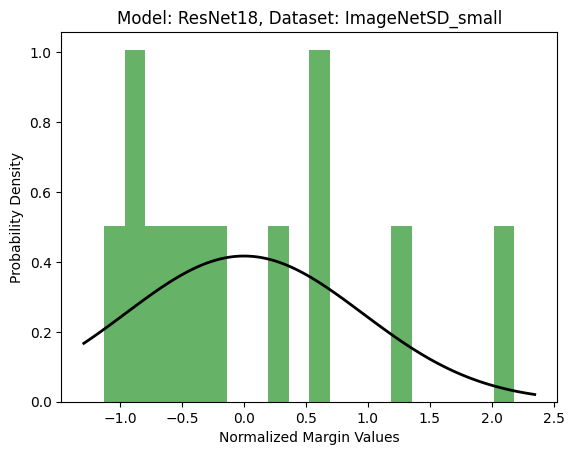

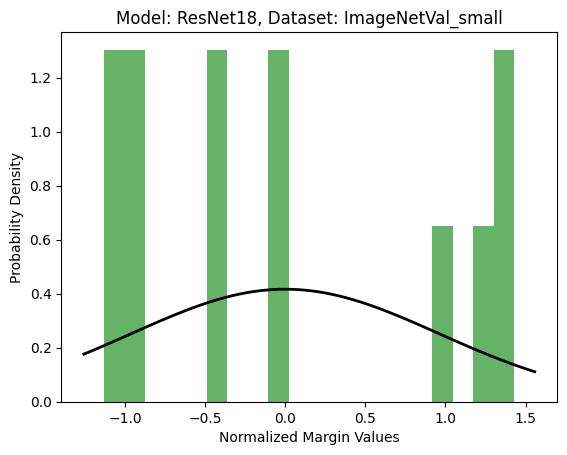

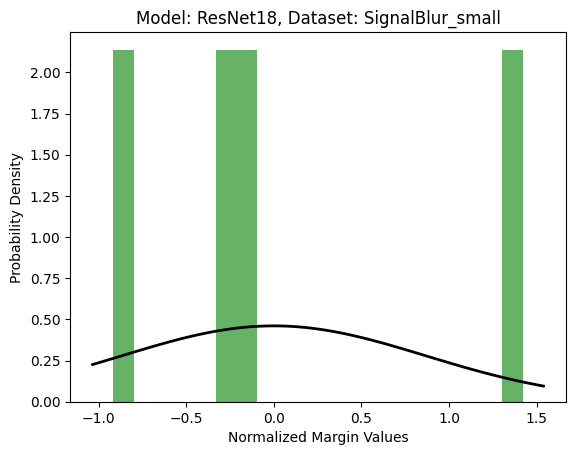

In [12]:
plot_normalized_pmf('results\CambioMargin_1\margin_ResNet18.csv')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combination_margins(csv_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_path, header=None)

    # Group the DataFrame by the first two columns (model and dataset)
    grouped = df.groupby([0, 1])

    # Initialize the plot
    fig, ax = plt.subplots()

    # Iterate through the groups and plot the number of margins elements for each combination
    for name, group in grouped:
        model, dataset = name
        margins_values = group.iloc[:, 2:].values.flatten()
        num_elements = len(margins_values)
        mean_value = np.mean(margins_values)
        std_value = np.std(margins_values)

        # Plot the number of margins elements
        ax.scatter(num_elements, 0, label=f"{model}, {dataset}", marker='o')

        # Mark the mean and std on the plot
        ax.text(num_elements, mean_value, f'Mean: {mean_value:.2f}', rotation=45)
        ax.text(num_elements, std_value, f'Std: {std_value:.2f}', rotation=45)

    # Set plot labels and title
    ax.set_xlabel('Number of Margins Elements')
    ax.set_ylabel('Margin Values')
    ax.set_title('Number of Margins Elements for Each Combination')

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()
plot_combination_margins(csv_path)


ParserError: Error tokenizing data. C error: Expected 2 fields in line 2, saw 14


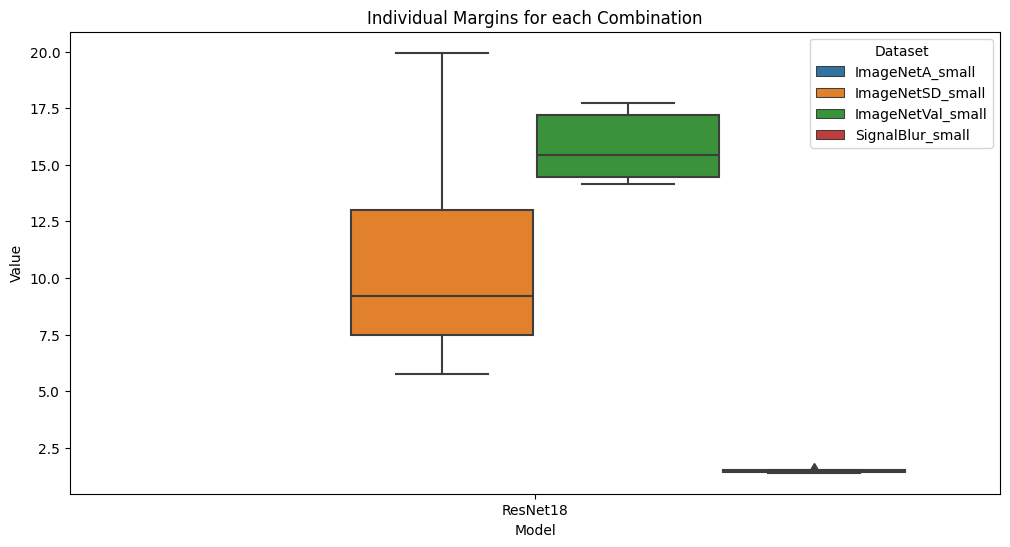

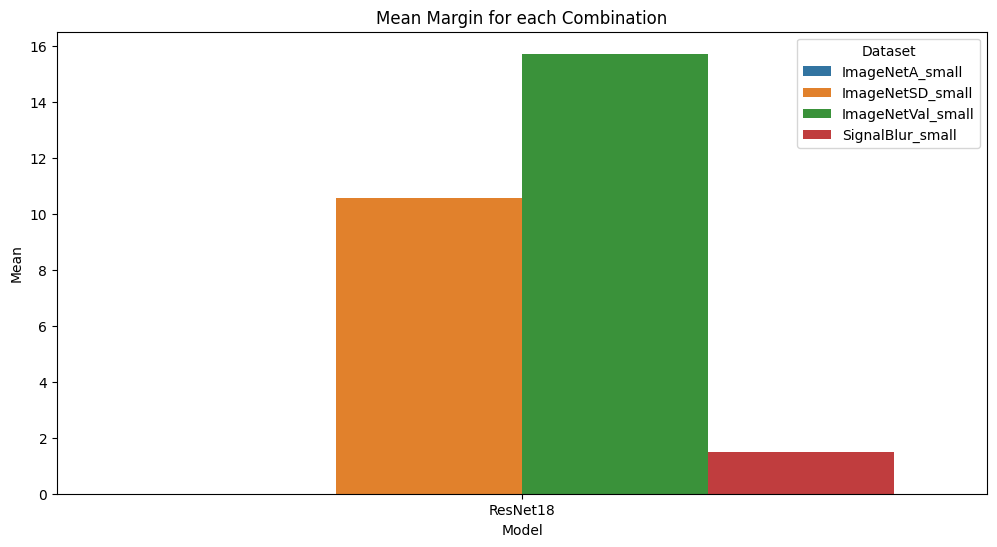

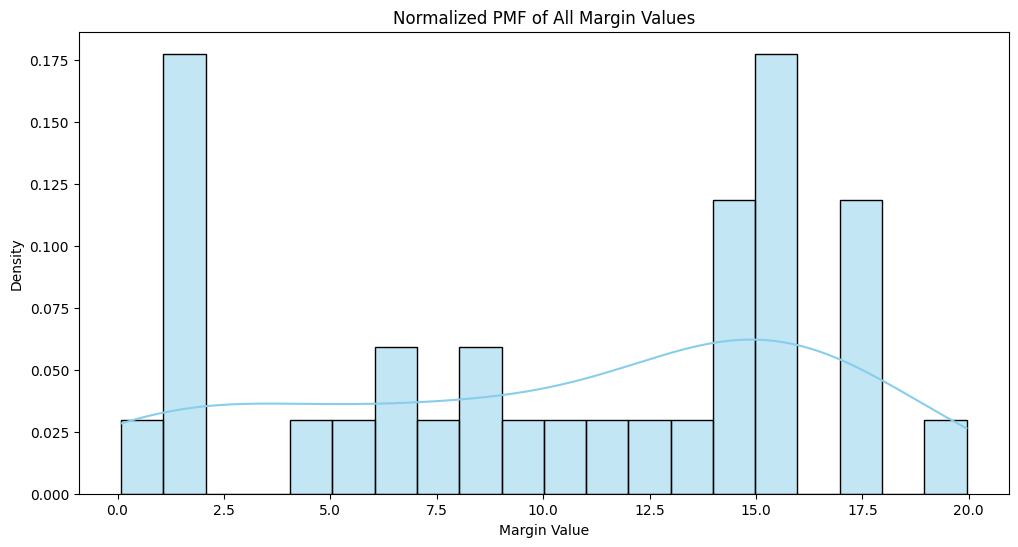

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

csv_file = 'results\CambioMargin_1\margin_ResNet18.csv'
# Read CSV file into a DataFrame
df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + [f'Margin_{i}' for i in range(1, 13)])

# Calculate mean and standard deviation for each combination
df['Mean'] = df.iloc[:, 2:].mean(axis=1)
df['Std'] = df.iloc[:, 2:].std(axis=1)

# Create a new column for all margin values
all_margins = df.iloc[:, 2:].values.flatten()

# Plot individual margins
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Value', hue='Dataset',
            data=pd.melt(df, id_vars=['Model', 'Dataset'], value_vars=df.columns[2:-2], var_name='Margin', value_name='Value'))
plt.title('Individual Margins for each Combination')
plt.show()

# Plot mean and std for each combination
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean', hue='Dataset', data=df)
plt.title('Mean Margin for each Combination')
plt.show()

# Plot normalized pmf of all margin values
plt.figure(figsize=(12, 6))
sns.histplot(all_margins, kde=True, stat='density', bins=20, color='skyblue')
plt.title('Normalized PMF of All Margin Values')
plt.xlabel('Margin Value')
plt.ylabel('Density')
plt.show()




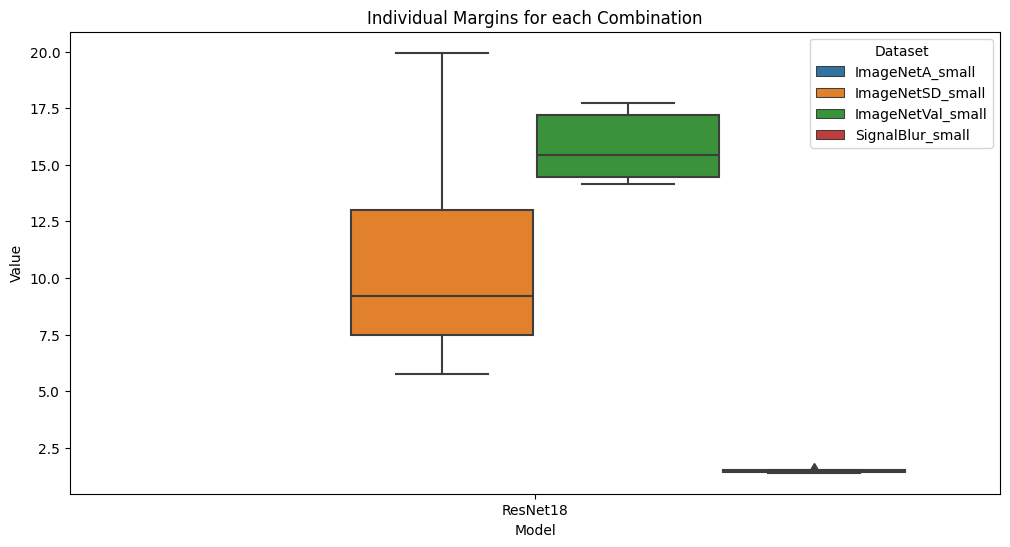

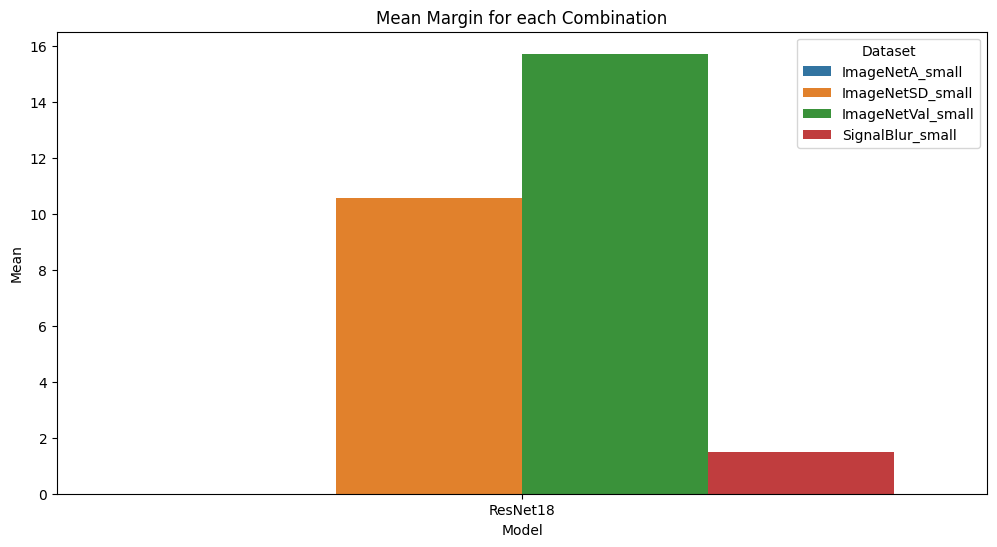

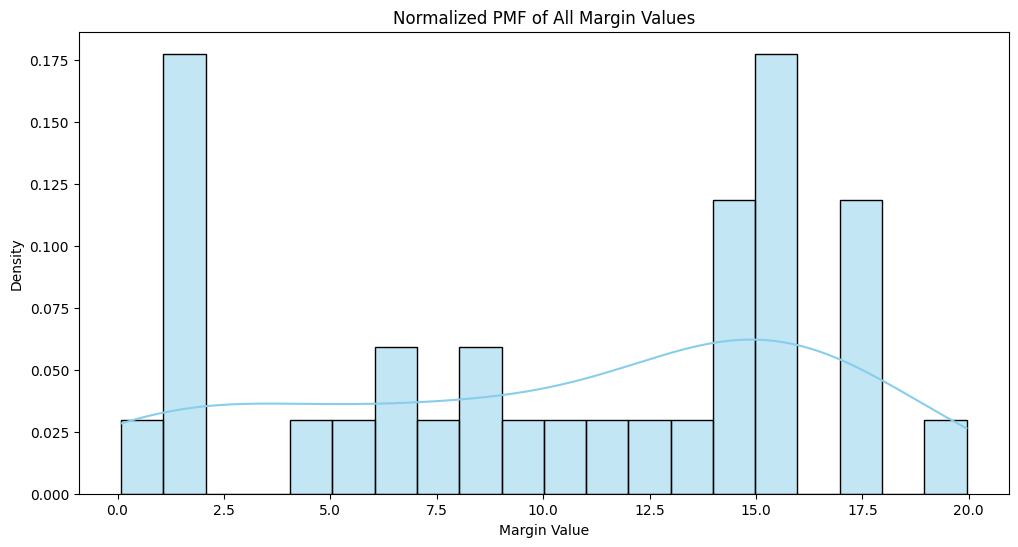

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

csv_file = 'results\CambioMargin_1\margin_ResNet18.csv'
# Read CSV file into a DataFrame
df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + [f'Margin_{i}' for i in range(1, 13)])

# Calculate mean and standard deviation for each combination
df['Mean'] = df.iloc[:, 2:].mean(axis=1)
df['Std'] = df.iloc[:, 2:].std(axis=1)

# Create a new column for all margin values
all_margins = df.iloc[:, 2:].values.flatten()

# Plot individual margins
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Value', hue='Dataset',
            data=pd.melt(df, id_vars=['Model', 'Dataset'], value_vars=df.columns[2:-2], var_name='Margin', value_name='Value'))
plt.title('Individual Margins for each Combination')
plt.show()

# Plot mean and std for each combination
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean', hue='Dataset', data=df)
plt.title('Mean Margin for each Combination')
plt.show()

# Plot normalized pmf of all margin values
plt.figure(figsize=(12, 6))
sns.histplot(all_margins, kde=True, stat='density', bins=20, color='skyblue')
plt.title('Normalized PMF of All Margin Values')
plt.xlabel('Margin Value')
plt.ylabel('Density')
plt.show()


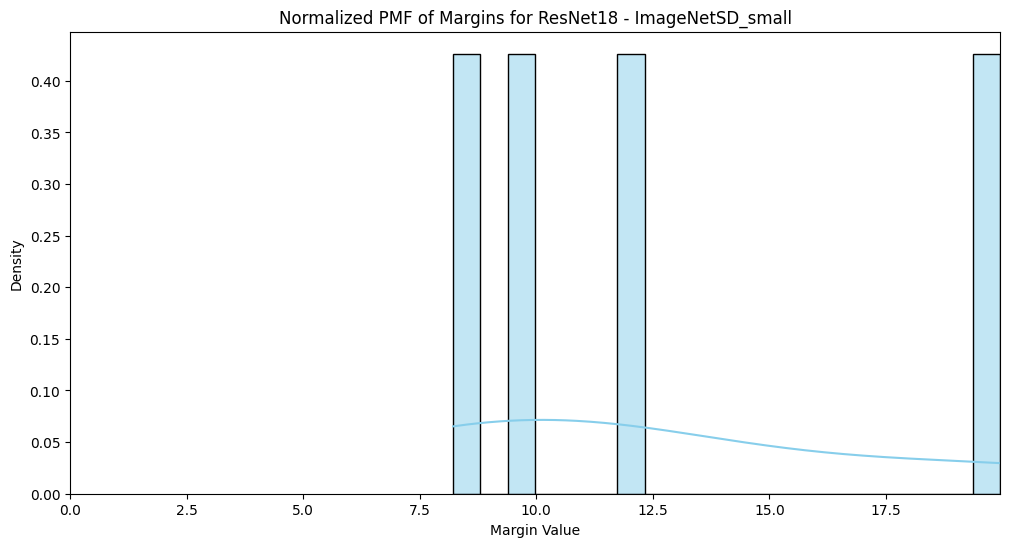

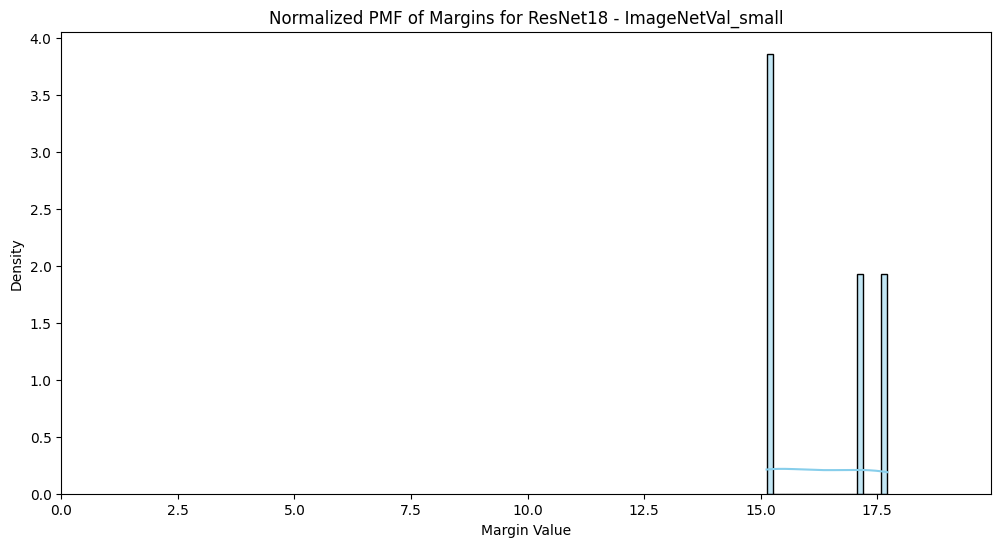

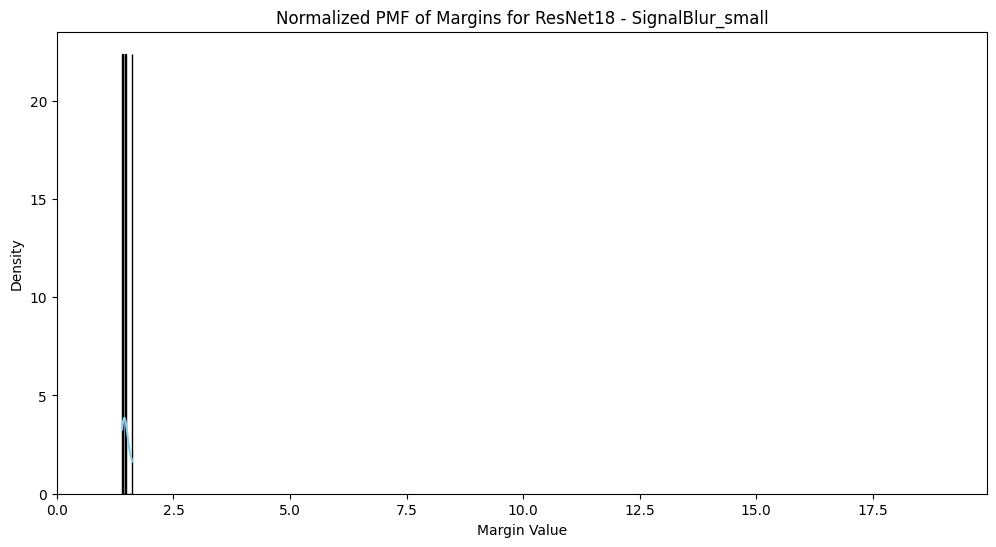

In [26]:
# Calculate the maximum value across all margins
max_margin_value = df[['Margin_1', 'Margin_2', 'Margin_3', 'Margin_4']].max().max()

# Number of bins you want
num_bins = 20

# Iterate over each combination of Model and Dataset
for _, row in df.iterrows():
    model = row['Model']
    dataset = row['Dataset']
    
    # Check if all values are NaN
    if row[['Margin_1', 'Margin_2', 'Margin_3', 'Margin_4']].isna().all():
        continue  # Skip if all values are NaN
    
    # Extract non-NaN values
    non_nan_margins = row[['Margin_1', 'Margin_2', 'Margin_3', 'Margin_4']].dropna()

    # Plot the pmf for each combination with consistent x-axis limits and bin widths
    plt.figure(figsize=(12, 6))
    sns.histplot(non_nan_margins, kde=True, stat='density', bins=num_bins, color='skyblue')
    plt.title(f'Normalized PMF of Margins for {model} - {dataset}')
    plt.xlabel('Margin Value')
    plt.ylabel('Density')
    plt.xlim(0, max_margin_value)  # Set consistent x-axis limits
    plt.show()

In [27]:
print(df)

      Model            Dataset  Margin_1  Margin_2  Margin_3  Margin_4  \
0  ResNet18    ImageNetA_small       NaN       NaN       NaN       NaN   
1  ResNet18   ImageNetSD_small    9.7604   19.9471   11.9015    8.2173   
2  ResNet18  ImageNetVal_small   15.1272   17.7191   15.1294   17.1544   
3  ResNet18   SignalBlur_small    1.4548    1.3981    1.6214    1.4683   

   Margin_5  Margin_6  Margin_7  Margin_8  Margin_9  Margin_10  Margin_11  \
0       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
1    8.6215   12.9545   13.1433    5.7379    6.6661     7.7494    15.8052   
2   14.4062   14.1633   14.5018   14.1653   17.6365    17.3916    15.6941   
3       NaN       NaN       NaN       NaN       NaN        NaN        NaN   

   Margin_12       Mean       Std  
0        NaN        NaN       NaN  
1     6.4943  10.583208  4.108526  
2    15.6956  15.732042  1.331395  
3        NaN   1.485650  0.082683  
